## import necessary python libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sb_utils import save_file

In [2]:
# Read csv file 
df = pd.read_csv("accepted_2007_to_2018Q4.csv", low_memory=False)
#data_rej = pd.read_csv("rejected_2007_to_2018Q4.csv")

In [3]:
# check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


In [4]:
# check first few rows of the data
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


##### check potential lebels earlier so that it would be easier to drop the missing rows/columns

In [5]:
# Loan_Status is a potential label I want to predict
print(" The 'Loan_Status' variable is missing by: ", 100 - df.loan_status.count()*100./max(df.count()))
print(" The 'Interest_Rate' variable is missing by: ", 100 - df.int_rate.count()*100./max(df.count()))

 The 'Loan_Status' variable is missing by:  0.0014597242182787795
 The 'Interest_Rate' variable is missing by:  0.0014597242182787795


In [6]:
#sns.countplot(df.loan_status)
df['loan_status'].value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

In [7]:
#df.isna().sum()

###### I have consider loan status and interest rate as potential labels and good news is that both of them have almost no Missing or Null values

## Understand the data
### Find missing values by columns and remove if more than 90% data is missing


In [8]:
print("Total shape of the data", df.shape)

Total shape of the data (2260701, 151)


In [9]:
missing = pd.concat([df.isnull().sum(), 100*df.isnull().mean()], axis=1)
missing.columns = ["count", "%"]
missing.sort_values(by = ["count"], ascending = False)

,count,%
member_id,2260701,100.000000
orig_projected_additional_accrued_interest,2252050,99.617331
hardship_end_date,2249784,99.517097
hardship_start_date,2249784,99.517097
hardship_type,2249784,99.517097
...,...,...
policy_code,33,0.001460
revol_bal,33,0.001460
fico_range_high,33,0.001460
fico_range_low,33,0.001460


In [10]:
## check the list of the columns having more than 90% data is missing and drop them
cnt = df.count()
col_del = cnt <= cnt.max()*0.9
col_del = cnt[col_del]
print("List of the columns to be dropped out", list(col_del.index))
df1 = df.drop(list(col_del.index), axis = 1)

List of the columns to be dropped out ['member_id', 'desc', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'revol_bal_joint', 'sec_app_fico_range_low', 'sec_app_fico_range_high', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog', 'hardship_type', 'hardship_reason', 'hardship_status', 'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date', 'p

In [11]:
print("New shape of the data", df1.shape)

New shape of the data (2260701, 92)


## FIND rows where null values are found and drop them

In [12]:
df2 = df1.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df2.shape

(1852324, 92)

## There are no more null values in the dataset.
## Now explore the category of the data

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852324 entries, 0 to 2260697
Data columns (total 92 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   id                          object 
 1   loan_amnt                   float64
 2   funded_amnt                 float64
 3   funded_amnt_inv             float64
 4   term                        object 
 5   int_rate                    float64
 6   installment                 float64
 7   grade                       object 
 8   sub_grade                   object 
 9   emp_title                   object 
 10  emp_length                  object 
 11  home_ownership              object 
 12  annual_inc                  float64
 13  verification_status         object 
 14  issue_d                     object 
 15  loan_status                 object 
 16  pymnt_plan                  object 
 17  url                         object 
 18  purpose                     object 
 19  title                

## check with object data types

In [14]:
## Group data by data types
df2.columns.to_series().groupby(df2.dtypes).groups

{float64: ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_12

In [15]:
## print object data types columns
obj_list = list(df2.select_dtypes(include=['object']).columns)
obj_list

['id',
 'term',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'last_pymnt_d',
 'last_credit_pull_d',
 'application_type',
 'hardship_flag',
 'disbursement_method',
 'debt_settlement_flag']

In [16]:
## print nun unique values of all object types
cat_feat = df2.select_dtypes('object').columns.values
df2[cat_feat].nunique().sort_values(ascending = False)

id                      1852324
url                     1852324
emp_title                441721
title                     35171
zip_code                    950
earliest_cr_line            733
last_credit_pull_d           81
last_pymnt_d                 79
issue_d                      77
addr_state                   51
sub_grade                    35
purpose                      14
emp_length                   11
loan_status                   7
grade                         7
home_ownership                6
verification_status           3
term                          2
pymnt_plan                    2
initial_list_status           2
application_type              2
hardship_flag                 2
disbursement_method           2
debt_settlement_flag          2
dtype: int64

In [17]:
## drop coumns that have many uniques values AND not useful for the future uses
df3 = df2.drop(['id','url', 'emp_title', 'zip_code','earliest_cr_line','last_credit_pull_d', 'last_pymnt_d', 'issue_d'], axis=1)

In [18]:
df3.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,10+ years,MORTGAGE,...,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,10+ years,MORTGAGE,...,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
3,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,10+ years,MORTGAGE,...,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,N,Cash,N
4,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,3 years,MORTGAGE,...,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N
5,11950.0,11950.0,11950.0,36 months,13.44,405.18,C,C3,4 years,RENT,...,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0,N,Cash,N


In [19]:
df3.purpose.value_counts()

debt_consolidation    1057139
credit_card            427135
home_improvement       122146
other                  109982
major_purchase          40064
medical                 21647
car                     18324
small_business          18042
vacation                12351
moving                  12266
house                   11356
renewable_energy         1088
wedding                   782
educational                 2
Name: purpose, dtype: int64

##  check with numeric data types

In [20]:
num_feat = df3.select_dtypes('float64').columns.values
df3[num_feat].nunique().sort_values(ascending = False)

total_pymnt         1365731
total_pymnt_inv     1141579
last_pymnt_amnt      623065
total_rec_int        592561
tot_hi_cred_lim      507952
                     ...   
acc_now_delinq            9
inq_last_6mths            9
num_tl_120dpd_2m          7
num_tl_30dpd              5
policy_code               1
Length: 68, dtype: int64

In [21]:
df3[num_feat].describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,1.852324e+06,1.852324e+06,1.852324e+06,1.852324e+06,1.852324e+06,1.852324e+06,1.852324e+06,1.852324e+06,1.852324e+06,1.852324e+06,...,1.852324e+06,1.852324e+06,1.852324e+06,1.852324e+06,1.852324e+06,1.852324e+06,1.852324e+06,1.852324e+06,1.852324e+06,1.852324e+06
mean,1.542493e+04,1.542492e+04,1.541973e+04,1.303282e+01,4.551503e+02,8.062924e+04,1.895265e+01,3.127865e-01,6.987327e+02,7.027328e+02,...,7.873083e-02,2.088916e+00,9.422728e+01,4.216253e+01,1.236155e-01,4.832956e-02,1.846144e+05,5.383278e+04,2.368598e+04,4.665703e+04
std,9.247357e+03,9.247358e+03,9.245230e+03,4.850342e+00,2.682615e+02,1.115967e+05,1.155800e+01,8.751482e-01,3.281786e+01,3.281860e+01,...,4.819732e-01,1.824942e+00,8.885309e+00,3.608518e+01,3.611214e-01,3.869295e-01,1.812808e+05,5.093052e+04,2.289159e+04,4.572662e+04
min,1.000000e+03,1.000000e+03,7.250000e+02,5.310000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.600000e+02,6.640000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+02,0.000000e+00,1.000000e+02,0.000000e+00
25%,8.000000e+03,8.000000e+03,8.000000e+03,9.440000e+00,2.600900e+02,4.990000e+04,1.229000e+01,0.000000e+00,6.750000e+02,6.790000e+02,...,0.000000e+00,1.000000e+00,9.170000e+01,0.000000e+00,0.000000e+00,0.000000e+00,5.512500e+04,2.320200e+04,8.700000e+03,1.791300e+04
50%,1.387500e+04,1.387500e+04,1.382500e+04,1.262000e+01,3.881100e+02,6.800000e+04,1.808000e+01,0.000000e+00,6.900000e+02,6.940000e+02,...,0.000000e+00,2.000000e+00,1.000000e+02,3.750000e+01,0.000000e+00,0.000000e+00,1.228115e+05,4.026500e+04,1.680000e+04,3.520600e+04
75%,2.000000e+04,2.000000e+04,2.000000e+04,1.580000e+01,6.053400e+02,9.548425e+04,2.464000e+01,0.000000e+00,7.150000e+02,7.190000e+02,...,0.000000e+00,3.000000e+00,1.000000e+02,7.000000e+01,0.000000e+00,0.000000e+00,2.658360e+05,6.735300e+04,3.100000e+04,6.179800e+04
max,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,9.990000e+02,5.800000e+01,8.450000e+02,8.500000e+02,...,5.800000e+01,3.100000e+01,1.000000e+02,1.000000e+02,1.200000e+01,8.500000e+01,9.999999e+06,3.408095e+06,1.105500e+06,2.118996e+06


In [22]:
df3.num_tl_30dpd.value_counts()

0.0    1847279
1.0       4801
2.0        213
3.0         24
4.0          7
Name: num_tl_30dpd, dtype: int64

### Lets check our target variable in more details and remove the unnecessary values

###### Since I am interested to predict either the loan was paid off or not so, I want to keep only "Fully Paid" & "Charged Off"
remove the others

In [53]:
df3['loan_status'].value_counts(dropna=False)

Fully Paid            880570
Current               734292
Charged Off           210041
Late (31-120 days)     17051
In Grace Period         6949
Late (16-30 days)       3391
Default                   30
Name: loan_status, dtype: int64

In [79]:
df4 = df3.loc[df3['loan_status'].isin(['Fully Paid', 'Charged Off'])]

### Lets check outlier by plotting boxplots of few ineresting variables



In [94]:
df44 = df3[num_feat]   ## contains only floating numbers

In [95]:
df4.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,10+ years,MORTGAGE,...,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,10+ years,MORTGAGE,...,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
4,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,3 years,MORTGAGE,...,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N
5,11950.0,11950.0,11950.0,36 months,13.44,405.18,C,C3,4 years,RENT,...,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0,N,Cash,N
6,20000.0,20000.0,20000.0,36 months,9.17,637.58,B,B2,10+ years,MORTGAGE,...,100.0,0.0,0.0,388852.0,116762.0,31500.0,46452.0,N,Cash,N


<AxesSubplot:xlabel='grade', ylabel='loan_amnt'>

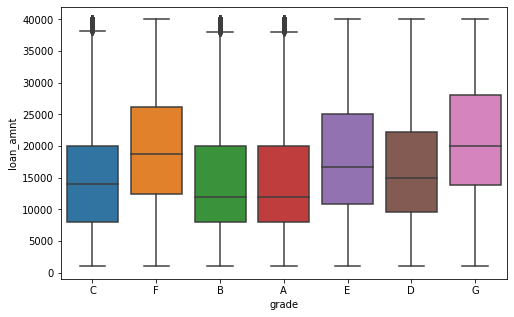

In [87]:
plt.figure(figsize = (8,5))
sns.boxplot(y="loan_amnt", x="grade", data=df3)

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

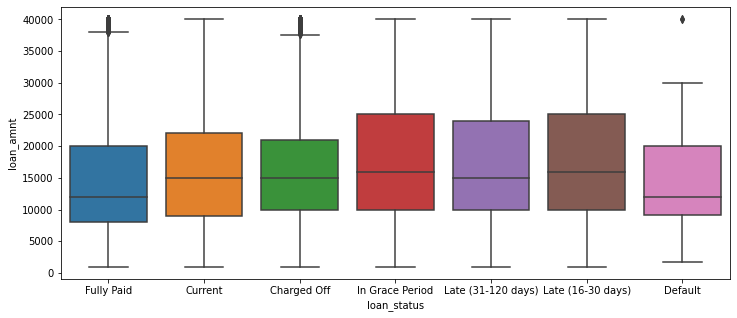

In [86]:
plt.figure(figsize = (12,5))
sns.boxplot(y="loan_amnt", x="loan_status", data=df3)

<AxesSubplot:xlabel='loan_status', ylabel='int_rate'>

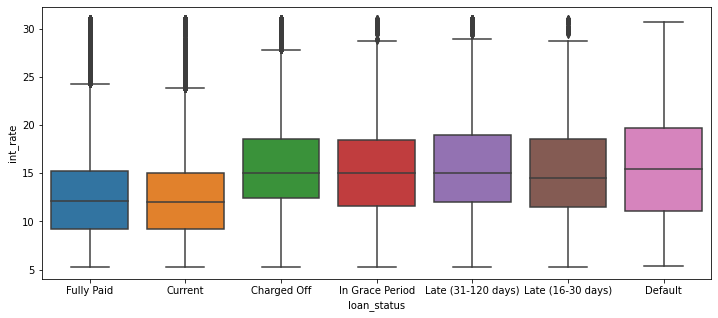

In [85]:
plt.figure(figsize = (12,5))
sns.boxplot(y="int_rate", x="loan_status", data=df3)

<AxesSubplot:xlabel='emp_length', ylabel='int_rate'>

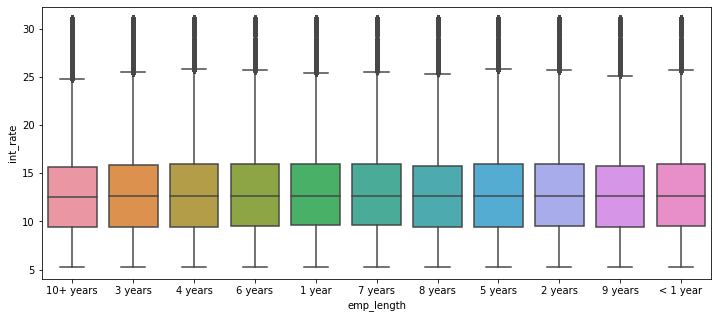

In [76]:
plt.figure(figsize = (12,5))
sns.boxplot(x="emp_length", y = "int_rate", data=df3)

In [98]:
corr = df44.iloc[:, 0:50].corr()

<AxesSubplot:>

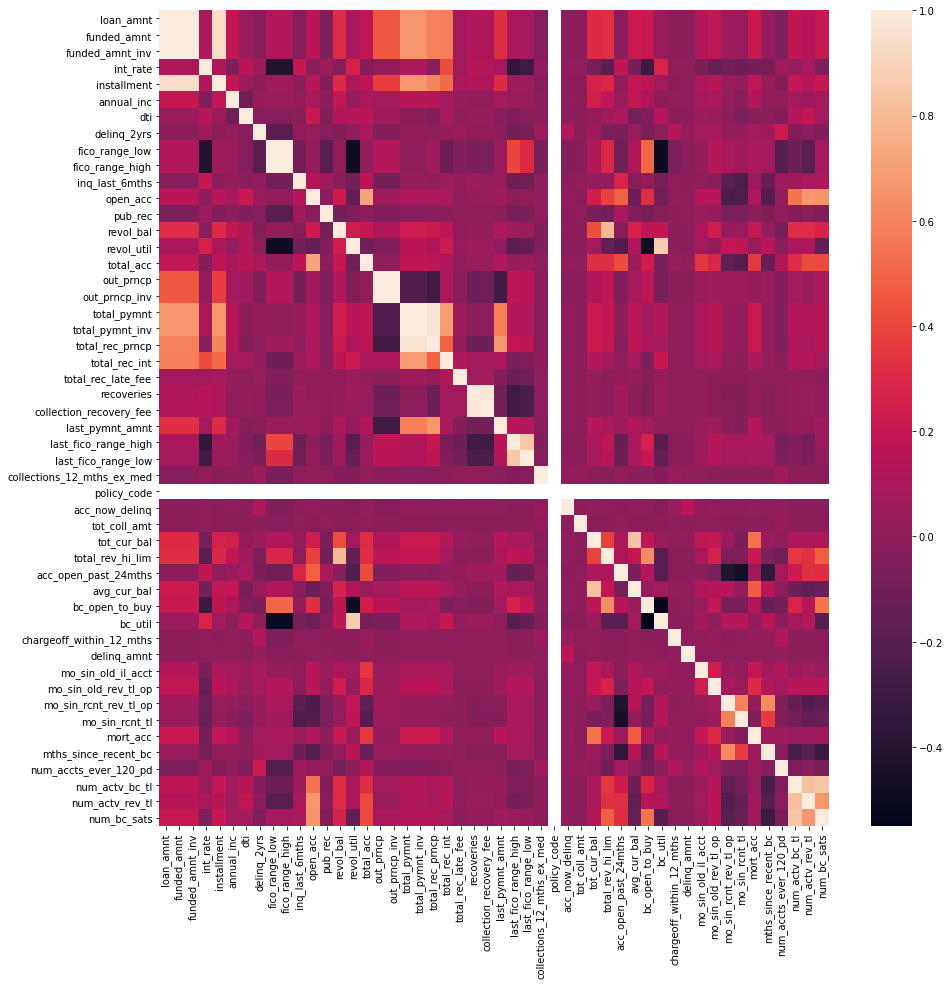

In [99]:
plt.figure(figsize=(15,15))
sns.heatmap(corr)

## Seems like the data has no missing values and good to go for next steps

In [31]:
## save data 
#data_dir = "./"
#save_file(df3, "LendingClub_cleaned.csv", data_dir)